# Rastreamento de objetos e machine learning

Rastreamento de cores, objetos e aplicação de técnicas de machine learning pré-treinadas e desenvolvimento de algoritmos próprios.

Alguns recursos e códigos foram adaptados deste [repositório](https://github.com/udacity/CVND_Exercises/) do curso de Visão Computacional da Udacity.

** Importante ressaltar que precisamos do OpenCV >= 3.4.2. Pode ser instalado pelo comando**

```conda install -c conda-forge opencv```

Verificando versão instalada do OpenCV

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

#Exibição na mesma tela do Jupyter
%matplotlib inline

from os import listdir
from os.path import isfile, join

import pandas as pd

import dlib

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

3.4.2


In [3]:
import scipy.io
mat = scipy.io.loadmat('/Users/michel.fernandes/Downloads/wiki_crop/wiki.mat')

In [4]:
instances = mat['wiki'][0][0][0].shape[1]
 
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]
 
import pandas as pd
df = pd.DataFrame(index = range(0,instances), columns = columns)
 
for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]
        for j in range(len(current_array)):
            df[columns[j]] = pd.DataFrame(current_array[j][0])

In [4]:
df

dob  photo_taken                          full_path  gender  \
0      723671         2009  [17/10000217_1981-05-05_2009.jpg]     1.0   
1      703186         1964  [48/10000548_1925-04-04_1964.jpg]     1.0   
2      711677         2008    [12/100012_1948-07-03_2008.jpg]     1.0   
3      705061         1961  [65/10001965_1930-05-23_1961.jpg]     1.0   
4      720044         2012  [16/10002116_1971-05-31_2012.jpg]     0.0   
...       ...          ...                                ...     ...   
62323  707582         1963   [49/9996949_1937-04-17_1963.jpg]     1.0   
62324  711338         1970   [32/9997032_1947-07-30_1970.jpg]     1.0   
62325  720620         2013   [09/9998109_1972-12-27_2013.jpg]     1.0   
62326  723893         2011   [00/9999400_1981-12-13_2011.jpg]     1.0   
62327  713846         2008    [80/999980_1954-06-11_2008.jpg]     0.0   

                         name  \
0           [Sami Jauhojärvi]   
1            [Dettmar Cramer]   
2               [Marc Okrand]   
3      [Aleksandar Matanović]   
4              [Diana Damrau]   
...                       ...   
62323             [Guus Haak]   
62324         [Nico Rijnders]   
62325     [Michael Wiesinger]   
62326        [Johann Grugger]   
62327    [Greta Van Susteren]   

                                           face_location  face_score  \
0      [[111.29109473290997, 111.29109473290997, 252....    4.300962   
1      [[252.48330229530742, 126.68165114765371, 354....    2.645639   
2          [[113.52, 169.83999999999997, 366.08, 422.4]]    4.329329   
3                                     [[1, 1, 634, 440]]        -inf   
4      [[171.61031405173117, 75.57451239763239, 266.7...    3.408442   
...                                                  ...         ...   
62323  [[128.92773553879837, 128.92773553879837, 320....    4.029268   
62324                                 [[1, 1, 285, 440]]        -inf   
62325  [[169.88839785556354, 74.31669471981023, 235.2...    3.494303   
62326                                     [[1, 1, 1, 1]]        -inf   
62327  [[92.72633234774001, 62.04355489849334, 230.12...    5.486917   

       second_face_score  
0                    NaN  
1               1.949248  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
62323                NaN  
62324                NaN  
62325                NaN  
62326                NaN  
62327                NaN  

[62328 rows x 8 columns]

In [5]:
from datetime import datetime, timedelta

def datenum_to_datetime(datenum):
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    exact_date = datetime.fromordinal(int(datenum)) + timedelta(days=int(days)) + timedelta(hours=int(hours)) + timedelta(minutes=int(minutes)) + timedelta(seconds=round(seconds)) - timedelta(days=366)
 
    return exact_date.year
 
df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)

In [6]:
import numpy as np
df

dob  photo_taken                          full_path  gender  \
0      723671         2009  [17/10000217_1981-05-05_2009.jpg]     1.0   
1      703186         1964  [48/10000548_1925-04-04_1964.jpg]     1.0   
2      711677         2008    [12/100012_1948-07-03_2008.jpg]     1.0   
3      705061         1961  [65/10001965_1930-05-23_1961.jpg]     1.0   
4      720044         2012  [16/10002116_1971-05-31_2012.jpg]     0.0   
...       ...          ...                                ...     ...   
62323  707582         1963   [49/9996949_1937-04-17_1963.jpg]     1.0   
62324  711338         1970   [32/9997032_1947-07-30_1970.jpg]     1.0   
62325  720620         2013   [09/9998109_1972-12-27_2013.jpg]     1.0   
62326  723893         2011   [00/9999400_1981-12-13_2011.jpg]     1.0   
62327  713846         2008    [80/999980_1954-06-11_2008.jpg]     0.0   

                         name  \
0           [Sami Jauhojärvi]   
1            [Dettmar Cramer]   
2               [Marc Okrand]   
3      [Aleksandar Matanović]   
4              [Diana Damrau]   
...                       ...   
62323             [Guus Haak]   
62324         [Nico Rijnders]   
62325     [Michael Wiesinger]   
62326        [Johann Grugger]   
62327    [Greta Van Susteren]   

                                           face_location  face_score  \
0      [[111.29109473290997, 111.29109473290997, 252....    4.300962   
1      [[252.48330229530742, 126.68165114765371, 354....    2.645639   
2          [[113.52, 169.83999999999997, 366.08, 422.4]]    4.329329   
3                                     [[1, 1, 634, 440]]        -inf   
4      [[171.61031405173117, 75.57451239763239, 266.7...    3.408442   
...                                                  ...         ...   
62323  [[128.92773553879837, 128.92773553879837, 320....    4.029268   
62324                                 [[1, 1, 285, 440]]        -inf   
62325  [[169.88839785556354, 74.31669471981023, 235.2...    3.494303   
62326                                     [[1, 1, 1, 1]]        -inf   
62327  [[92.72633234774001, 62.04355489849334, 230.12...    5.486917   

       second_face_score  date_of_birth  
0                    NaN           1981  
1               1.949248           1925  
2                    NaN           1948  
3                    NaN           1930  
4                    NaN           1971  
...                  ...            ...  
62323                NaN           1937  
62324                NaN           1947  
62325                NaN           1972  
62326                NaN           1981  
62327                NaN           1954  

[62328 rows x 9 columns]

In [7]:
#remove pictures does not include face
df = df[df['face_score'] != -np.inf]
 
#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]
 
#check threshold
df = df[df['face_score'] >= 3]
 
#some records do not have a gender information
df = df[~df['gender'].isna()]

df['age'] = df['photo_taken'] - df['date_of_birth']

In [8]:
df

dob  photo_taken                          full_path  gender  \
0      723671         2009  [17/10000217_1981-05-05_2009.jpg]     1.0   
2      711677         2008    [12/100012_1948-07-03_2008.jpg]     1.0   
4      720044         2012  [16/10002116_1971-05-31_2012.jpg]     0.0   
5      716189         2012  [02/10002702_1960-11-09_2012.jpg]     0.0   
6      707745         1971  [41/10003541_1937-09-27_1971.jpg]     1.0   
...       ...          ...                                ...     ...   
62321  707521         1968   [38/9996938_1937-02-15_1968.jpg]     1.0   
62322  709971         1968   [46/9996946_1943-11-01_1968.jpg]     1.0   
62323  707582         1963   [49/9996949_1937-04-17_1963.jpg]     1.0   
62325  720620         2013   [09/9998109_1972-12-27_2013.jpg]     1.0   
62327  713846         2008    [80/999980_1954-06-11_2008.jpg]     0.0   

                        name  \
0          [Sami Jauhojärvi]   
2              [Marc Okrand]   
4             [Diana Damrau]   
5           [Krista Tippett]   
6         [Bernie Whitebear]   
...                      ...   
62321         [Coen Moulijn]   
62322  [Theo van Duivenbode]   
62323            [Guus Haak]   
62325    [Michael Wiesinger]   
62327   [Greta Van Susteren]   

                                           face_location  face_score  \
0      [[111.29109473290997, 111.29109473290997, 252....    4.300962   
2          [[113.52, 169.83999999999997, 366.08, 422.4]]    4.329329   
4      [[171.61031405173117, 75.57451239763239, 266.7...    3.408442   
5      [[274.76563240288175, 57.7700900839337, 376.88...    4.748056   
6      [[79.35580188693945, 26.65993396231315, 197.60...    4.184828   
...                                                  ...         ...   
62321  [[83.1122019227873, 83.1122019227873, 329.2488...    3.868307   
62322  [[123.45351931209424, 196.99763089935078, 343....    3.735573   
62323  [[128.92773553879837, 128.92773553879837, 320....    4.029268   
62325  [[169.88839785556354, 74.31669471981023, 235.2...    3.494303   
62327  [[92.72633234774001, 62.04355489849334, 230.12...    5.486917   

       second_face_score  date_of_birth  age  
0                    NaN           1981   28  
2                    NaN           1948   60  
4                    NaN           1971   41  
5                    NaN           1960   52  
6                    NaN           1937   34  
...                  ...            ...  ...  
62321                NaN           1937   31  
62322                NaN           1943   25  
62323                NaN           1937   26  
62325                NaN           1972   41  
62327                NaN           1954   54  

[22155 rows x 10 columns]

In [9]:
df.to_csv('age-faces-dataset.csv')

In [18]:
from keras.preprocessing import image

target_size = (224, 224)
 
def getImageData(image_path):
    img = image.load_img("/Users/michel.fernandes/Downloads/wiki_crop/%s" % image_path[0], grayscale=False, target_size=target_size)
    x = image.img_to_array(img).reshape(1, -1)[0]
    return x
 
df['pixels'] = df['full_path'].apply(getImageData)

/Users/michel.fernandes/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [19]:
df.head(10)

dob  photo_taken                          full_path  gender  \
0   723671         2009  [17/10000217_1981-05-05_2009.jpg]     1.0   
2   711677         2008    [12/100012_1948-07-03_2008.jpg]     1.0   
4   720044         2012  [16/10002116_1971-05-31_2012.jpg]     0.0   
5   716189         2012  [02/10002702_1960-11-09_2012.jpg]     0.0   
6   707745         1971  [41/10003541_1937-09-27_1971.jpg]     1.0   
10  697114         1950  [99/10004299_1908-08-19_1950.jpg]     1.0   
11  706177         1969   [56/1000456_1933-06-12_1969.jpg]     1.0   
12  725873         2010  [82/10004882_1987-05-16_2010.jpg]     1.0   
15  723643         2006  [47/10005947_1981-04-07_2006.jpg]     0.0   
17  720853         2010  [50/10006850_1973-08-17_2010.jpg]     1.0   

                  name                                      face_location  \
0    [Sami Jauhojärvi]  [[111.29109473290997, 111.29109473290997, 252....   
2        [Marc Okrand]      [[113.52, 169.83999999999997, 366.08, 422.4]]   
4       [Diana Damrau]  [[171.61031405173117, 75.57451239763239, 266.7...   
5     [Krista Tippett]  [[274.76563240288175, 57.7700900839337, 376.88...   
6   [Bernie Whitebear]  [[79.35580188693945, 26.65993396231315, 197.60...   
10    [Carl Greenberg]  [[107.58644628233198, 107.58644628233198, 298....   
11       [Eddie Adams]  [[240.23999999999998, 71.27999999999999, 366.0...   
12    [Viktor Pfeifer]  [[75.25800000000001, 96.57000000000001, 122.54...   
15       [Sharka Blue]  [[113.52, 141.67999999999998, 366.08, 394.2399...   
17    [David Bromstad]  [[130.93069968577643, 75.19468553472939, 297.2...   

    face_score  second_face_score  date_of_birth  age  \
0     4.300962                NaN           1981   28   
2     4.329329                NaN           1948   60   
4     3.408442                NaN           1971   41   
5     4.748056                NaN           1960   52   
6     4.184828                NaN           1937   34   
10    4.526657                NaN           1908   42   
11    5.551841                NaN           1933   36   
12    3.975478                NaN           1987   23   
15    4.143016                NaN           1981   25   
17    3.242852                NaN           1973   37   

                                               pixels  
0   [255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...  
2   [92.0, 97.0, 91.0, 89.0, 94.0, 90.0, 91.0, 96....  
4   [61.0, 30.0, 10.0, 61.0, 30.0, 10.0, 61.0, 30....  
5   [97.0, 122.0, 178.0, 97.0, 122.0, 178.0, 97.0,...  
6   [190.0, 189.0, 194.0, 204.0, 203.0, 208.0, 203...  
10  [75.0, 70.0, 66.0, 78.0, 73.0, 69.0, 81.0, 76....  
11  [174.0, 174.0, 174.0, 174.0, 174.0, 174.0, 173...  
12  [187.0, 186.0, 192.0, 187.0, 186.0, 192.0, 187...  
15  [75.0, 2.0, 47.0, 78.0, 2.0, 49.0, 82.0, 2.0, ...  
17  [207.0, 208.0, 194.0, 207.0, 208.0, 194.0, 207...

In [25]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [53]:
df.shape[0]

22155

In [ ]:
classes = 2
target = df['gender'].values
target_classes = keras.utils.to_categorical(target, classes)
 
features = []
 
for i in range(0, df.shape[0]):
    #Carregando imagens de cada linha
    features.append(df['pixels'].values[i])


In [27]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, target_classes, test_size=0.30)

In [46]:
features[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 86.,  89.,  98.],
        [ 89.,  92., 101.],
        [ 93.,  96., 105.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 85.,  88.,  97.],
        [ 88.,  91., 100.],
        [ 94.,  97., 106.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 84.,  87.,  96.],
        [ 88.,  91., 100.],
        [ 95.,  98., 107.]],

       ...,

       [[ 46.,  83., 136.],
        [ 34.,  71., 124.],
        [ 29.,  66., 121.],
        ...,
        [ 15.,  79., 141.],
        [ 16.,  80., 144.],
        [ 26.,  73., 141.]],

       [[ 43.,  80., 132.],
        [ 29.,  66., 119.],
        [ 23.,  60., 113.],
        ...,
        [ 19.,  83., 145.],
        [ 17.,  81., 145.],
        [ 34.,  79., 147.]],

       [[ 41.,  76., 130.],
        [ 40.,  75., 129.],
        [ 33.,  

In [39]:
df['pixels'].values[2]

array([ 61.,  30.,  10., ..., 255., 237., 231.], dtype=float32)

In [40]:
# Construindo um modelo sequencial
model = Sequential()

# Este componente, se trata de um filtro ou uma camada convulacional. Ela será responsável por 
# colocar uma janela de kernel (3x3), navegar pela imagem e extrair a soma dos pixels de cada janela
# o passo para mover a janela, chamado Stride, por padrão é de um pixel
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(224,224, 3)))

# A camada de Pooling (ou MaxPooling2D) tem o papel de reduzir a dimensionalidade. Neste caso, a partir 
# da etapa anterior, será dividia em grupos de 2 x 2 pixels e será obtida o maior valor deles
model.add(MaxPooling2D(pool_size=(2,2)))

# Esta etapa conhecida como "achatamento" é onde abrimos os dados organizados em tabelas (ou matrizes) 
# par auma única linha
model.add(Flatten())

# A camada densa (ou Dense) conectará cada elemento da camada anterior e passará para a próxima
# camada com as classes existentes
model.add(Dense(128, activation="relu"))

# O Dropout é um ruído gerado para evitar overfitting
model.add(Dropout(0.2))

# A camada final, determinará qual classe escolher. Por tal razão ela possui a ativação Softmax, que retorna 
# a probabilidade por classe
model.add(Dense(2, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 28)      784       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 28)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 344988)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               44158592  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 44,159,634
Trainable params: 44,159,634
Non-trainable params: 0
________________________________________________________________

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_x,y=train_y, epochs=10)

ValueError: Error when checking target: expected dense_2 to have shape (1,) but got array with shape (2,)

In [45]:
train_x[2]

array([[[ 44.,  43.,  38.],
        [ 44.,  43.,  38.],
        [ 44.,  43.,  38.],
        ...,
        [ 49.,  54.,  47.],
        [ 45.,  48.,  39.],
        [ 38.,  41.,  32.]],

       [[ 43.,  42.,  37.],
        [ 43.,  42.,  37.],
        [ 43.,  42.,  37.],
        ...,
        [ 49.,  54.,  47.],
        [ 51.,  57.,  47.],
        [ 38.,  44.,  34.]],

       [[ 44.,  41.,  36.],
        [ 44.,  41.,  36.],
        [ 44.,  41.,  36.],
        ...,
        [ 50.,  55.,  48.],
        [ 52.,  60.,  49.],
        [ 43.,  51.,  40.]],

       ...,

       [[ 27.,  32.,  28.],
        [ 27.,  32.,  28.],
        [ 27.,  32.,  28.],
        ...,
        [147., 194., 204.],
        [139., 185., 198.],
        [132., 178., 191.]],

       [[ 32.,  41.,  40.],
        [ 32.,  41.,  40.],
        [ 32.,  41.,  40.],
        ...,
        [142., 189., 199.],
        [137., 183., 196.],
        [129., 175., 188.]],

       [[ 42.,  52.,  54.],
        [ 42.,  52.,  54.],
        [ 42.,  

In [3]:
df_fer = pd.read_csv("datasets/fer2013/fer2013.csv", index_col=0)
df_fer.head(5)

pixels     Usage
emotion                                                             
0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
0        151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        231 212 156 164 174 138 161 173 182 200 106 38...  Training
4        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
6        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [18]:
#0=Angry, 1=Disgust, 2=Fear [x], 3=Happy, 4=Sad [x], 5=Surprise, 6=Neutral

id_image = 1
for index, row in df_fer.iterrows():
    pixels = np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
    image = pixels.reshape((48,48))
    path=join('datasets/fer2013/fer_images/',str(row['Usage']),str(index),str(id_image)+'.jpg')
    cv2.imwrite(path, image)
    print("Imagem armazenada em " + path + ".")
    id_image += 1

Imagem armazenada em datasets/fer2013/fer_images/Training/0/1.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/2.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/6.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/12.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training

Imagem armazenada em datasets/fer2013/fer_images/Training/4/131.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/132.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/133.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/134.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/135.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/136.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/137.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/138.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/139.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/140.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/141.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/142.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/143.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/144.jpg.
Imagem armazenada em datasets/fer2

Imagem armazenada em datasets/fer2013/fer_images/Training/2/293.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/294.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/295.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/296.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/297.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/298.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/299.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/300.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/301.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/302.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/303.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/304.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/305.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/306.jpg.
Imagem armazenada em datasets/fer2

Imagem armazenada em datasets/fer2013/fer_images/Training/5/498.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/499.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/500.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/501.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/502.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/503.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/504.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/505.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/506.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/507.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/508.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/509.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/510.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/511.jpg.
Imagem armazenada em datasets/fer2

Imagem armazenada em datasets/fer2013/fer_images/Training/2/713.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/714.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/715.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/716.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/717.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/718.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/719.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/720.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/721.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/722.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/723.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/724.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/725.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/726.jpg.
Imagem armazenada em datasets/fer2

Imagem armazenada em datasets/fer2013/fer_images/Training/5/866.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/867.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/868.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/869.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/870.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/871.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/872.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/873.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/874.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/875.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/876.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/877.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/878.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/879.jpg.
Imagem armazenada em datasets/fer2

Imagem armazenada em datasets/fer2013/fer_images/Training/4/1068.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1069.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/1070.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1071.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1072.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1073.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/1074.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1075.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1076.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1077.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1078.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/1079.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1080.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1081.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/1229.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/1230.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1231.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1232.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1233.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1234.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/1235.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1236.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1237.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1238.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1239.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1240.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1241.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1242.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/1391.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/1392.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1393.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1394.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1395.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1396.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1397.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1398.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1399.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1400.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1401.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1402.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1403.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1404.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/0/1589.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1590.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1591.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1592.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/1593.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1594.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1595.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1596.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1597.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1598.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/1599.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1600.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1601.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1602.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/1797.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1798.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1799.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1800.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1801.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1802.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1803.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1804.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1805.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1806.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1807.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1808.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1809.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1810.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/4/1986.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1987.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1988.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1989.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/1990.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1991.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/1992.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1993.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/1994.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1995.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1996.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/1997.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/1998.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/1999.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/6/2213.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2214.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2215.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/2216.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2217.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/2218.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2219.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2220.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/2221.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/2222.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2223.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2224.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2225.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/2226.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/6/2434.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/2435.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2436.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2437.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2438.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/2439.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2440.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2441.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/2442.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2443.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2444.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2445.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/2446.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2447.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/3/2590.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/2591.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2592.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/2593.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/2594.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/2595.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/2596.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/2597.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2598.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/2599.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/2600.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2601.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2602.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2603.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/6/2877.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2878.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/2879.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/2880.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2881.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/2882.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2883.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/2884.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/2885.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/2886.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/2887.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2888.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/2889.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/2890.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/0/3103.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3104.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3105.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3106.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3107.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3108.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/3109.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3110.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3111.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/3112.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3113.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3114.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3115.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3116.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/6/3322.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3323.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3324.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3325.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3326.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/3327.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3328.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/3329.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3330.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3331.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3332.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3333.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3334.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3335.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/4/3545.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3546.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/3547.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3548.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/3549.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3550.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/3551.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3552.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3553.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3554.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3555.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3556.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/3557.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3558.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/6/3772.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3773.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/3774.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3775.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3776.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/3777.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3778.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/3779.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3780.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/3781.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/3782.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3783.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3784.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3785.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/3985.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3986.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3987.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3988.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/3989.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3990.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3991.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3992.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/3993.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3994.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/3995.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/3996.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3997.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/3998.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/5/4204.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4205.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4206.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4207.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4208.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4209.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4210.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4211.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4212.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4213.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4214.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4215.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4216.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4217.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/4424.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4425.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4426.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/4427.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/4428.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4429.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4430.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/4431.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/4432.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4433.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4434.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4435.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4436.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/4437.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/3/4643.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4644.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4645.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4646.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/4647.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4648.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/4649.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4650.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/4651.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4652.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/4653.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4654.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4655.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/4656.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/4867.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4868.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4869.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/4870.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4871.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/4872.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4873.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4874.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/4875.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4876.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/4877.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4878.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/4879.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/4880.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/4/5089.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5090.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5091.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/5092.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5093.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5094.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5095.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5096.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5097.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5098.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5099.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5100.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5101.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5102.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/5312.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5313.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5314.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5315.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5316.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5317.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5318.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5319.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5320.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5321.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5322.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5323.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5324.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5325.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/5/5531.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5532.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5533.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5534.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5535.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5536.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5537.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5538.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5539.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5540.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5541.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5542.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5543.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5544.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/6/5750.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5751.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/5752.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5753.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5754.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5755.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5756.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5757.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5758.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5759.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/5760.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/5761.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5762.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5763.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/4/5890.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5891.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5892.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5893.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/5894.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5895.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5896.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5897.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/5898.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/5899.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5900.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/5901.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5902.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/5903.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/6114.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/6115.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6116.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6117.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6118.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/6119.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6120.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/6121.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6122.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6123.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6124.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6125.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6126.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6127.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/3/6330.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6331.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/6332.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6333.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6334.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6335.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/6336.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6337.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6338.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6339.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6340.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/6341.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/6342.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/6343.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/3/6473.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6474.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6475.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6476.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/6477.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6478.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6479.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6480.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/6481.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6482.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/6483.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/6484.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6485.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6486.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/6694.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6695.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6696.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6697.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6698.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/6699.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6700.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6701.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6702.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6703.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6704.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6705.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/6706.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6707.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/6911.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/6912.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6913.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6914.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6915.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6916.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6917.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/6918.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6919.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6920.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/6921.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6922.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/6923.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/6924.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/6/7132.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/7133.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/7134.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7135.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7136.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7137.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/7138.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7139.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/7140.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/7141.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7142.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7143.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/7144.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/7145.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/7351.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7352.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/7353.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/7354.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/7355.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7356.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7357.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7358.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7359.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7360.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7361.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/7362.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7363.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7364.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/4/7565.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7566.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7567.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7568.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7569.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7570.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/7571.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/7572.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7573.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7574.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/7575.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/7576.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7577.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7578.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/4/7783.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7784.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/7785.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/7786.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/7787.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/7788.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/7789.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/7790.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7791.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7792.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7793.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/7794.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7795.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/7796.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/0/8002.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8003.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8004.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8005.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8006.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/8007.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8008.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8009.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/8010.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/8011.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8012.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8013.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/8014.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/8015.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/3/8221.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/8222.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8223.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8224.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/8225.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/8226.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8227.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8228.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8229.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8230.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8231.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8232.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8233.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8234.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/2/8430.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8431.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/8432.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/8433.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/8434.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8435.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8436.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8437.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8438.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/8439.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8440.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8441.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8442.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8443.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/6/8644.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8645.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/8646.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8647.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8648.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8649.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8650.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8651.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8652.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8653.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8654.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8655.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8656.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8657.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/4/8867.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/8868.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8869.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8870.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8871.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/8872.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8873.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/8874.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/8875.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8876.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8877.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/8878.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/8879.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/8880.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/5/9094.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9095.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9096.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9097.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9098.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9099.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9100.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9101.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9102.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9103.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9104.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9105.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9106.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9107.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/0/9318.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9319.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9320.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/9321.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9322.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9323.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9324.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9325.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9326.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9327.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9328.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9329.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9330.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9331.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/3/9533.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9534.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9535.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9536.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9537.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/9538.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9539.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9540.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9541.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/9542.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9543.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9544.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9545.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9546.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/4/9746.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9747.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9748.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9749.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/9750.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9751.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9752.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9753.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9754.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9755.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/9756.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9757.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9758.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9759.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/3/9968.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9969.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/9970.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9971.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9972.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/9973.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9974.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9975.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9976.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/9977.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9978.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9979.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/9980.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/9981.jpg.
Imagem armazenada em

Imagem armazenada em datasets/fer2013/fer_images/Training/3/10194.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10195.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10196.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10197.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10198.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10199.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10200.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10201.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10202.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10203.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10204.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10205.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10206.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10207.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/5/10412.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/10413.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10414.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/10415.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10416.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/10417.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/10418.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10419.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/10420.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10421.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10422.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10423.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/10424.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10425.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/10622.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10623.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10624.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10625.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/10626.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10627.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/10628.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/10629.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10630.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10631.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/10632.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/10633.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10634.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10635.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/10822.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10823.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10824.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10825.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10826.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/10827.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10828.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/10829.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/10830.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10831.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/10832.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10833.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/10834.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/10835.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/11022.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11023.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11024.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11025.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/11026.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/11027.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/11028.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11029.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11030.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11031.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/11032.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11033.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11034.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11035.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/11226.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11227.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11228.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11229.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11230.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11231.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11232.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11233.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11234.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/11235.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11236.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11237.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11238.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/11239.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/11437.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11438.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11439.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11440.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11441.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11442.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11443.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/11444.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11445.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/11446.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11447.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11448.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11449.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11450.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/11639.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/11640.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/11641.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11642.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11643.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11644.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11645.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11646.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11647.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11648.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11649.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11650.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11651.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11652.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/11855.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11856.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11857.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11858.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11859.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/11860.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11861.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11862.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11863.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/11864.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/11865.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/11866.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/11867.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/11868.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/12070.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12071.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12072.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/12073.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12074.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12075.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/12076.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/12077.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12078.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12079.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/12080.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/12081.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12082.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/12083.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/12271.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12272.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/12273.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12274.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/12275.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/12276.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/12277.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12278.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12279.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12280.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/12281.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12282.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12283.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/12284.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/12486.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/12487.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12488.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12489.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/12490.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/12491.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12492.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12493.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12494.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/12495.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12496.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12497.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12498.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12499.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/12690.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12691.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12692.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12693.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/12694.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12695.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/12696.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12697.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12698.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12699.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12700.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12701.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/12702.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12703.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/12892.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12893.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12894.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12895.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12896.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12897.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/12898.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/12899.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/12900.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/12901.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12902.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12903.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/12904.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/12905.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/13098.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/13099.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13100.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13101.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13102.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/13103.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13104.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13105.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13106.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/13107.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13108.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13109.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/13110.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/13111.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/13319.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/13320.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13321.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13322.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13323.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13324.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13325.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13326.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/13327.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13328.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13329.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13330.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13331.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13332.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/13533.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13534.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13535.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13536.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13537.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/13538.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13539.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13540.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/13541.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13542.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13543.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13544.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13545.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/13546.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/13742.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13743.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/13744.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13745.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13746.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13747.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13748.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13749.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13750.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/13751.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/13752.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13753.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13754.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13755.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/13957.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13958.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13959.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13960.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/13961.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13962.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/13963.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13964.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13965.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/13966.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13967.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/13968.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13969.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/13970.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/14148.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/14149.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14150.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14151.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14152.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14153.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/14154.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14155.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14156.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14157.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14158.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14159.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14160.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14161.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/14319.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14320.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14321.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14322.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14323.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14324.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/14325.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14326.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14327.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14328.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14329.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/14330.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14331.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/14332.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/14515.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14516.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14517.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14518.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14519.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14520.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14521.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14522.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14523.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14524.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14525.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14526.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/14527.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14528.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/14699.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14700.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14701.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14702.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14703.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14704.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14705.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/14706.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/14707.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14708.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14709.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/14710.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14711.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14712.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/14897.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14898.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14899.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14900.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14901.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14902.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14903.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14904.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14905.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14906.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/14907.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/14908.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/14909.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/14910.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/15093.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15094.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15095.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15096.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15097.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15098.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15099.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15100.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15101.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15102.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15103.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15104.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15105.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15106.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/15295.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/15296.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15297.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/15298.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15299.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15300.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15301.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15302.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/15303.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15304.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15305.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15306.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15307.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15308.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/15512.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15513.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15514.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15515.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15516.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15517.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15518.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15519.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/15520.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15521.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15522.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15523.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15524.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15525.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/15731.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15732.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15733.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15734.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15735.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15736.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/15737.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15738.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/15739.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/15740.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15741.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15742.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/15743.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/15744.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/15955.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/15956.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15957.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15958.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15959.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/15960.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15961.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15962.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/15963.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15964.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/15965.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/15966.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/15967.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/15968.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/16175.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16176.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16177.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/16178.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16179.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16180.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16181.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16182.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/16183.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/16184.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16185.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/16186.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/16187.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16188.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/16392.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16393.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16394.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16395.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16396.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/16397.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/16398.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16399.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16400.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16401.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16402.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16403.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16404.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/16405.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/16613.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16614.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16615.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16616.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16617.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16618.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/16619.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16620.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/16621.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16622.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/16623.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16624.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16625.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16626.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/16826.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16827.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16828.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/16829.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/16830.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/16831.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16832.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16833.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/16834.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16835.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16836.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/16837.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/16838.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/16839.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/17050.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17051.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17052.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/17053.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17054.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17055.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17056.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/17057.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17058.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17059.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17060.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17061.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/17062.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17063.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/17257.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17258.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/17259.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17260.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/17261.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17262.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17263.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17264.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17265.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17266.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17267.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17268.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17269.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17270.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/5/17465.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17466.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17467.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17468.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17469.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17470.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17471.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17472.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17473.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17474.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17475.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17476.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17477.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17478.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/5/17661.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17662.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17663.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17664.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17665.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17666.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17667.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17668.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17669.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17670.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17671.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17672.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17673.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17674.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/17856.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17857.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17858.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17859.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17860.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17861.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/17862.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/17863.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17864.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/17865.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17866.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17867.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/17868.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/17869.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/18061.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/18062.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18063.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18064.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18065.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18066.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/18067.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/18068.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18069.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/18070.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18071.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18072.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/18073.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18074.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/18214.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18215.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/18216.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18217.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18218.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18219.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18220.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18221.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/18222.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18223.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18224.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18225.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18226.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18227.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/18433.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18434.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18435.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18436.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/18437.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/18438.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18439.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18440.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/18441.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18442.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18443.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18444.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18445.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18446.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/18651.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18652.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18653.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18654.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/18655.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18656.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18657.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18658.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18659.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18660.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18661.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18662.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18663.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18664.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/18862.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/18863.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18864.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/18865.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/18866.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/18867.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18868.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18869.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18870.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/18871.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18872.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/18873.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/18874.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/18875.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/19079.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19080.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/19081.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19082.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19083.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19084.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19085.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/19086.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19087.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/19088.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/19089.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19090.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19091.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19092.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/19272.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19273.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19274.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19275.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/19276.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19277.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19278.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19279.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19280.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19281.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/19282.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19283.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/19284.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19285.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/19466.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19467.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19468.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19469.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19470.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19471.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19472.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19473.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19474.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19475.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19476.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19477.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19478.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19479.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/19653.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19654.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19655.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19656.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19657.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19658.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19659.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19660.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/19661.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19662.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19663.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19664.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19665.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/19666.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/19833.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19834.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/19835.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19836.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/19837.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19838.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19839.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/19840.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19841.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/19842.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/19843.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/19844.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/19845.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/19846.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/20034.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20035.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20036.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20037.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20038.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20039.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20040.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20041.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20042.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20043.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20044.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/20045.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20046.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20047.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/20236.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20237.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/20238.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20239.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20240.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20241.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20242.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20243.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20244.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20245.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20246.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20247.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20248.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20249.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/20443.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20444.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20445.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20446.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20447.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20448.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20449.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20450.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20451.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/20452.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20453.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20454.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20455.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20456.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/20594.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20595.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20596.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20597.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20598.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20599.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20600.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20601.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20602.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20603.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20604.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/20605.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20606.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20607.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/20770.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20771.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20772.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20773.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20774.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20775.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20776.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20777.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20778.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20779.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20780.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20781.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20782.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20783.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/20976.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20977.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/20978.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20979.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20980.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/20981.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20982.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/20983.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20984.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20985.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20986.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/20987.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/20988.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/20989.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/21183.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21184.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/21185.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21186.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21187.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/21188.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21189.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21190.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/21191.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21192.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21193.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21194.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21195.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/21196.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/21368.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/21369.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/21370.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21371.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21372.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21373.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21374.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21375.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21376.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21377.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/21378.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21379.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21380.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21381.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/21562.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21563.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21564.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21565.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21566.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21567.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21568.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/21569.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21570.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/21571.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21572.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21573.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21574.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21575.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/21737.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21738.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21739.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21740.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/21741.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/21742.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21743.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21744.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/21745.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21746.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21747.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21748.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21749.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21750.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/21914.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21915.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/21916.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21917.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21918.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/21919.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21920.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21921.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21922.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21923.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/21924.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/21925.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/21926.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/21927.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/22102.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22103.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22104.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22105.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/22106.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22107.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22108.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22109.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22110.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22111.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22112.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22113.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22114.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22115.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/5/22313.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22314.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22315.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22316.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/22317.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22318.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22319.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22320.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/22321.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22322.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22323.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22324.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22325.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/22326.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/22513.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22514.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22515.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22516.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22517.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/22518.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22519.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22520.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22521.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22522.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22523.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22524.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22525.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22526.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/22731.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22732.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22733.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22734.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/22735.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/22736.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22737.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22738.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22739.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/22740.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22741.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22742.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/22743.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22744.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/22957.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22958.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22959.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22960.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22961.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22962.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/22963.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/22964.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22965.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/22966.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22967.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22968.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/22969.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/22970.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/23176.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23177.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/23178.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23179.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23180.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23181.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/23182.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23183.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23184.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23185.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23186.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23187.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23188.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/23189.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/23375.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/23376.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/23377.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23378.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/23379.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/23380.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23381.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23382.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/23383.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23384.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/23385.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23386.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/23387.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23388.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/23596.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23597.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23598.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23599.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23600.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23601.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23602.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23603.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/23604.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23605.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23606.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23607.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23608.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/23609.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/23821.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23822.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23823.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23824.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23825.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23826.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23827.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/23828.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23829.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23830.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/23831.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/23832.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23833.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/23834.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/24035.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24036.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/24037.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24038.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24039.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24040.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/24041.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24042.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/24043.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24044.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24045.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24046.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/24047.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24048.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/24201.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/24202.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24203.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24204.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24205.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/24206.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24207.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24208.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24209.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24210.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/24211.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24212.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/24213.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24214.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/24365.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/24366.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24367.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24368.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24369.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24370.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24371.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/24372.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24373.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24374.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/24375.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24376.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24377.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24378.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/24536.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24537.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24538.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24539.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24540.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24541.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24542.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24543.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24544.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24545.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24546.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24547.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24548.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/24549.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/24708.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24709.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24710.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24711.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24712.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24713.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/24714.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/24715.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24716.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24717.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24718.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24719.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24720.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24721.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/1/24871.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24872.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24873.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24874.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24875.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24876.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/24877.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/24878.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24879.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24880.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/24881.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/24882.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/24883.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/24884.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/5/25045.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25046.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25047.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25048.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25049.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25050.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25051.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25052.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25053.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25054.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25055.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25056.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25057.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25058.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/25225.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25226.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25227.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25228.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25229.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25230.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25231.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25232.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25233.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25234.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25235.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25236.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25237.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25238.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/25399.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25400.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25401.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25402.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25403.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25404.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25405.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25406.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25407.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25408.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25409.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25410.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25411.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25412.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/6/25555.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25556.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25557.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/25558.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25559.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25560.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25561.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25562.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25563.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25564.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25565.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25566.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25567.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25568.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/25760.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25761.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25762.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25763.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25764.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/25765.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/25766.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25767.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25768.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25769.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25770.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25771.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25772.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25773.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/5/25969.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25970.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25971.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25972.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25973.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25974.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25975.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25976.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25977.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/25978.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25979.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25980.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/25981.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/25982.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/26164.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26165.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26166.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26167.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26168.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26169.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26170.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26171.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26172.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26173.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26174.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26175.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26176.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26177.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/26378.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/26379.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26380.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26381.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26382.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26383.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26384.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26385.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26386.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26387.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26388.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26389.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26390.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26391.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/26619.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/26620.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26621.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26622.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26623.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26624.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26625.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26626.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26627.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26628.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26629.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26630.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26631.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26632.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/26790.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26791.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/26792.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26793.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26794.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/26795.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/1/26796.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26797.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26798.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26799.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26800.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26801.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26802.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26803.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/26967.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26968.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/26969.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26970.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/26971.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/26972.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/26973.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/26974.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26975.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/26976.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26977.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26978.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/26979.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/26980.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/27150.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27151.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27152.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27153.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27154.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/27155.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27156.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27157.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27158.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27159.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27160.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27161.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27162.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27163.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/27355.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27356.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/27357.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27358.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/27359.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/27360.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/27361.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27362.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27363.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/27364.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27365.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27366.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27367.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27368.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/0/27539.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27540.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27541.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/27542.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27543.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27544.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27545.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27546.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27547.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27548.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27549.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27550.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27551.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27552.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/3/27719.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27720.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/27721.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27722.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27723.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27724.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/27725.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27726.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27727.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27728.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27729.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27730.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27731.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27732.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/1/27895.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/27896.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/27897.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27898.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/27899.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/27900.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27901.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27902.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/27903.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/27904.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/27905.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/27906.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/27907.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/27908.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/5/28069.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28070.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/28071.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28072.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28073.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/28074.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/28075.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28076.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/28077.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28078.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28079.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/28080.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28081.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28082.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/4/28273.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28274.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28275.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28276.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28277.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28278.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28279.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/28280.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/28281.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/28282.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28283.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/28284.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/28285.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/28286.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/Training/2/28456.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/28457.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28458.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/28459.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/5/28460.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/3/28461.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/28462.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/28463.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/0/28464.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/28465.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/28466.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/4/28467.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/6/28468.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Training/2/28469.jpg.
Imagem

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/28754.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/28755.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/28756.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/28757.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/28758.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/28759.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/28760.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/28761.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/28762.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/28763.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/28764.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/28765.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/28766.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/28961.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/28962.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/28963.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/28964.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/28965.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/28966.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/28967.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/28968.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/28969.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/28970.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/1/28971.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/28972.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/28973.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29151.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29152.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29153.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29154.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29155.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29156.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/29157.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29158.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/1/29159.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29160.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29161.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29162.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29163.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29316.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29317.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29318.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29319.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29320.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/29321.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29322.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29323.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/29324.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29325.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29326.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29327.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29328.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29484.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29485.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29486.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29487.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29488.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29489.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29490.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29491.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29492.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29493.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29494.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29495.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29496.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/29647.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29648.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29649.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29650.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29651.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29652.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29653.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29654.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29655.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29656.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29657.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29658.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29659.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29817.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29818.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/29819.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29820.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29821.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29822.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/29823.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/29824.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/29825.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29826.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29827.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29828.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29829.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29983.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29984.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/29985.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29986.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/29987.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29988.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29989.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/29990.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29991.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29992.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29993.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/29994.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/29995.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30148.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30149.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30150.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30151.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30152.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30153.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30154.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30155.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30156.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30157.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30158.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30159.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30160.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30311.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30312.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30313.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30314.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30315.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30316.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30317.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30318.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30319.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30320.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30321.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30322.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30323.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30473.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30474.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30475.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30476.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30477.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30478.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30479.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30480.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30481.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30482.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30483.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30484.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30485.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30641.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30642.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30643.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30644.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30645.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30646.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30647.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30648.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30649.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30650.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30651.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30652.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30653.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30806.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30807.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30808.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30809.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30810.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30811.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30812.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30813.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/30814.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30815.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30816.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30817.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30818.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30970.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30971.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30972.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30973.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30974.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30975.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30976.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/30977.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/30978.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/30979.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30980.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/30981.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/30982.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31134.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31135.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31136.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31137.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31138.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31139.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31140.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31141.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31142.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31143.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31144.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31145.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31146.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31293.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31294.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31295.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31296.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31297.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31298.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31299.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31300.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31301.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31302.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31303.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31304.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31305.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31489.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31490.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31491.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31492.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31493.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31494.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31495.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31496.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31497.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31498.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31499.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31500.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31501.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31624.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31625.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31626.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31627.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31628.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31629.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31630.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31631.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31632.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31633.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31634.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31635.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/31636.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31819.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31820.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31821.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/31822.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31823.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31824.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31825.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31826.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31827.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31828.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/1/31829.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31830.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/31831.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31993.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31994.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31995.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/31996.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31997.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/31998.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/31999.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/32000.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/2/32001.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/0/32002.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/32003.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/32004.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/5/32005.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/32183.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/32184.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/32185.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/32186.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/32187.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/32188.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/32189.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/32190.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/32191.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/32192.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/6/32193.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/4/32194.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PublicTest/3/32195.jpg.
Imagem armazenada em datasets/fer2013/fer_images/Pu

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/32390.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32391.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32392.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32393.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32394.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32395.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/32396.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32397.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32398.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/32399.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32400.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32401.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32402.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/32554.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32555.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32556.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32557.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32558.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32559.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/32560.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32561.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32562.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32563.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/32564.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32565.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32566.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/32721.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32722.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/32723.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32724.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32725.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32726.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32727.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/32728.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32729.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32730.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32731.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32732.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32733.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32854.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32855.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32856.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/32857.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32858.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/32859.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32860.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32861.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/32862.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32863.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/32864.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/32865.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/32866.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33066.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33067.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33068.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33069.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33070.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33071.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33072.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33073.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33074.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33075.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33076.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33077.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33078.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33242.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33243.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33244.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33245.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33246.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33247.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33248.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33249.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33250.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33251.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33252.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33253.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33254.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33411.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33412.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33413.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33414.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33415.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33416.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33417.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33418.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33419.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33420.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33421.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33422.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33423.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33614.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33615.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33616.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33617.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33618.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33619.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33620.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33621.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33622.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/33623.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33624.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33625.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33626.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33782.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33783.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33784.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/1/33785.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33786.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33787.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/33788.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33789.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33790.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33791.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33792.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33793.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/33794.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/33979.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33980.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33981.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33982.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/33983.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/33984.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/33985.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/33986.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/33987.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/33988.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/33989.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/33990.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/33991.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/34166.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34167.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/34168.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/34169.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/34170.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34171.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/34172.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/34173.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34174.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34175.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34176.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/34177.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34178.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34387.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/34388.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/34389.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34390.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/34391.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34392.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34393.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/34394.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34395.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/34396.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/34397.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34398.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34399.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/34611.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/34612.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/34613.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/34614.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34615.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/34616.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34617.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34618.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/34619.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/34620.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34621.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34622.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/1/34623.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/34832.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34833.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/34834.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/34835.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/34836.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34837.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/34838.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/34839.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/34840.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34841.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/34842.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34843.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/34844.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35042.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35043.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35044.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35045.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35046.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35047.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35048.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35049.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/35050.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35051.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35052.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35053.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35054.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35252.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35253.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35254.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35255.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35256.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35257.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35258.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35259.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35260.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35261.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35262.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35263.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35264.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35451.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35452.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35453.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35454.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35455.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35456.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35457.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35458.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/35459.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35460.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35461.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/35462.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35463.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35649.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35650.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35651.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35652.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35653.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35654.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35655.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35656.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35657.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35658.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35659.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35660.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35661.jpg.
Imagem armazenada em datasets/fer2013/

Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35871.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35872.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/35873.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/4/35874.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/35875.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/5/35876.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35877.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35878.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/3/35879.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35880.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/2/35881.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/0/35882.jpg.
Imagem armazenada em datasets/fer2013/fer_images/PrivateTest/6/35883.jpg.
Imagem armazenada em datasets/fer2013/

Text(0.5,1,'datasets/fer2013/fer_images/Training/6/918.jpg')

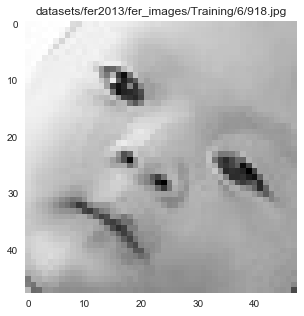

In [5]:
path = "datasets/fer2013/fer_images/Training/6/918.jpg"

imagem = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5,5))
plt.imshow(imagem, cmap="gray")
plt.title(path)

Faces encontradas: 0


Text(0.5,1,'Pessoas')

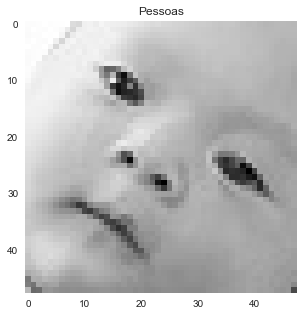

In [6]:
classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')
faces = classificador_face.detectMultiScale(imagem, 1.1, 5)
print("Faces encontradas: " + str(len(faces)))

imagem_anotada = imagem.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(imagem_anotada, (x,y), (x+w,y+h), (255,255,0), 1)
    
plt.figure(figsize=(5,5))
plt.imshow(imagem_anotada, cmap="gray")
plt.title("Pessoas")

In [7]:
classificador_dlib_68_pontos = "classificadores/shape_predictor_68_face_landmarks.dat"

classificador_dlib = dlib.shape_predictor(classificador_dlib_68_pontos)
detector_face = dlib.get_frontal_face_detector()

In [45]:
def clean_face_files2(imagem_caminho):
    #return True
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    retangulos = detector_face(imagem, 1)

    if len(retangulos) == 0:
        return False
        
    marcos = []
    
    for retangulo in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem, retangulo).parts()]))
    
    if len(marcos) > 0:
        if "Training" in imagem_caminho:
            cv2.imwrite(imagem_caminho.replace("Training", "Training_cleaned"), imagem)
        else:
            cv2.imwrite(imagem_caminho.replace("PublicTest", "PublicTest_cleaned"), imagem)
        return True
    else: 
        return False

In [30]:
print(pontos_marcos_faciais(imagem))

NameError: name 'pontos_marcos_faciais' is not defined

In [31]:
path_faces_train_0 = "datasets/fer2013/fer_images/Training/0/"
path_faces_train_1 = "datasets/fer2013/fer_images/Training/1/"
path_faces_train_2 = "datasets/fer2013/fer_images/Training/2/"
path_faces_train_3 = "datasets/fer2013/fer_images/Training/3/"
path_faces_train_4 = "datasets/fer2013/fer_images/Training/4/"
path_faces_train_5 = "datasets/fer2013/fer_images/Training/5/"
path_faces_train_6 = "datasets/fer2013/fer_images/Training/6/"

faces_train_0_angry = [f for f in listdir(path_faces_train_0) if join(path_faces_train_0, f).endswith(".jpg")]
faces_train_1_disgust = [f for f in listdir(path_faces_train_1) if join(path_faces_train_1, f).endswith(".jpg")]
faces_train_2_fear = [f for f in listdir(path_faces_train_2) if join(path_faces_train_2, f).endswith(".jpg")]
faces_train_3_happy = [f for f in listdir(path_faces_train_3) if join(path_faces_train_3, f).endswith(".jpg")]
faces_train_4_sad = [f for f in listdir(path_faces_train_4) if join(path_faces_train_4, f).endswith(".jpg")]
faces_train_5_surprise = [f for f in listdir(path_faces_train_5) if join(path_faces_train_5, f).endswith(".jpg")]
faces_train_6_neutral = [f for f in listdir(path_faces_train_6) if join(path_faces_train_6, f).endswith(".jpg")]

In [32]:
path_faces_val_0 = "datasets/fer2013/fer_images/PublicTest/0/"
path_faces_val_1 = "datasets/fer2013/fer_images/PublicTest/1/"
path_faces_val_2 = "datasets/fer2013/fer_images/PublicTest/2/"
path_faces_val_3 = "datasets/fer2013/fer_images/PublicTest/3/"
path_faces_val_4 = "datasets/fer2013/fer_images/PublicTest/4/"
path_faces_val_5 = "datasets/fer2013/fer_images/PublicTest/5/"
path_faces_val_6 = "datasets/fer2013/fer_images/PublicTest/6/"

faces_val_0_angry = [f for f in listdir(path_faces_val_0) if join(path_faces_val_0, f).endswith(".jpg")]
faces_val_1_disgust = [f for f in listdir(path_faces_val_1) if join(path_faces_val_1, f).endswith(".jpg")]
faces_val_2_fear = [f for f in listdir(path_faces_val_2) if join(path_faces_val_2, f).endswith(".jpg")]
faces_val_3_happy = [f for f in listdir(path_faces_val_3) if join(path_faces_val_3, f).endswith(".jpg")]
faces_val_4_sad = [f for f in listdir(path_faces_val_4) if join(path_faces_val_4, f).endswith(".jpg")]
faces_val_5_surprise = [f for f in listdir(path_faces_val_5) if join(path_faces_val_5, f).endswith(".jpg")]
faces_val_6_neutral = [f for f in listdir(path_faces_val_6) if join(path_faces_val_6, f).endswith(".jpg")]

In [11]:
faces_train_0_angry[0], faces_val_0_angry[0]

('9733.jpg', '30973.jpg')

In [12]:
path_faces_val_6 = "datasets/fer2013/fer_images/PublicTest/6/"
print(path_faces_val_6.replace("PublicTest", "PublicTest_cleaned"))

datasets/fer2013/fer_images/PublicTest_cleaned/6/


In [44]:
def clean_face_files(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    face = classificador_face.detectMultiScale(imagem, 1.1, 5)
    if len(face) == 1:
        if "Training" in imagem_caminho:
            cv2.imwrite(imagem_caminho.replace("Training", "Training_cleaned"), imagem)
        else:
            cv2.imwrite(imagem_caminho.replace("PublicTest", "PublicTest_cleaned"), imagem)
        return True
    else:
        return False

In [14]:
if clean_face_files("datasets/fer2013/fer_images/Training/4/919.jpg"):
    print("fak")

fak


In [60]:
dados_treinamento, labels_treinamento = [], []

count = 2300

c = 0

for i, arquivo in enumerate(faces_train_0_angry):
    
    imagem_caminho = path_faces_train_0 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        #dados_treinamento.append(imagem)
        #labels_treinamento.append(0)
        c += 1
        if c>count:
            break

c = 0
for i, arquivo in enumerate(faces_train_2_fear):
    imagem_caminho = path_faces_train_2 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        #dados_treinamento.append(imagem)
        #labels_treinamento.append(2)
        c += 1
        if c>count:
            break

c = 0
for i, arquivo in enumerate(faces_train_3_happy):
    imagem_caminho = path_faces_train_3 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        dados_treinamento.append(imagem)
        labels_treinamento.append(3)
        c += 1
        if c>count:
            break

c = 0
for i, arquivo in enumerate(faces_train_4_sad):
    imagem_caminho = path_faces_train_4 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        dados_treinamento.append(imagem)
        labels_treinamento.append(4)
        c += 1
        if c>count:
            break

c = 0
for i, arquivo in enumerate(faces_train_5_surprise):
    imagem_caminho = path_faces_train_5 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        #dados_treinamento.append(imagem)
        #labels_treinamento.append(5)
        c += 1
        if c>count:
            break
            
c = 0
for i, arquivo in enumerate(faces_train_6_neutral):
    imagem_caminho = path_faces_train_6 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        dados_treinamento.append(imagem)
        labels_treinamento.append(6)
        c += 1
        if c>count:
            break
    
labels_treinamento = np.asarray(labels_treinamento, dtype=np.int32)

In [61]:
dados_val, labels_val = [], []

count = 300

c = 0
for i, arquivo in enumerate(faces_val_0_angry):
    imagem_caminho = path_faces_val_0 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        #dados_val.append(imagem)
        #labels_val.append(0)
        c += 1
        if c>count:
            break

c = 0    
for i, arquivo in enumerate(faces_val_2_fear):
    imagem_caminho = path_faces_val_2 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        #dados_val.append(imagem)
        #labels_val.append(2)
        c += 1
        if c>count:
            break

c = 0
for i, arquivo in enumerate(faces_val_3_happy):
    imagem_caminho = path_faces_val_3 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        dados_val.append(imagem)
        labels_val.append(3)
        c += 1
        if c>count:
            break
            
c = 0
for i, arquivo in enumerate(faces_val_4_sad):
    imagem_caminho = path_faces_val_4 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        dados_val.append(imagem)
        labels_val.append(4)
        c += 1
        if c>count:
            break
    
c = 0
for i, arquivo in enumerate(faces_val_5_surprise):
    imagem_caminho = path_faces_val_5 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        #dados_val.append(imagem)
        #labels_val.append(4)
        c += 1
        if c>count:
            break

c = 0
for i, arquivo in enumerate(faces_val_6_neutral):
    imagem_caminho = path_faces_val_6 + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    if clean_face_files(imagem_caminho):
        dados_val.append(imagem)
        labels_val.append(6)
        c += 1
        if c>count:
            break
    
labels_val = np.asarray(labels_val, dtype=np.int32)

In [25]:
len(labels_treinamento), len(dados_treinamento)

(19782, 19782)

In [38]:
len(labels_treinamento), len(dados_treinamento)

(14792, 14792)

In [60]:
len(labels_treinamento), len(dados_treinamento)

(28709, 28709)

In [39]:
len(labels_val), len(dados_val)

(1819, 1819)

In [120]:
len(labels_val), len(dados_val)

(865, 865)

In [79]:
len(labels_val), len(dados_val)

(3589, 3589)

In [62]:
model = cv2.face.FisherFaceRecognizer_create()
model.train(dados_treinamento, labels_treinamento)

In [65]:
model = cv2.face.LBPHFaceRecognizer_create()
model.train(dados_treinamento, labels_treinamento)

In [52]:
model = cv2.face.EigenFaceRecognizer_create()
model.train(dados_treinamento, labels_treinamento)

In [66]:
y_pred = []

for item in dados_val:
    y_pred.append(model.predict(item)[0])

In [64]:
from sklearn.metrics import accuracy_score
print("Precisão:" + str(accuracy_score(labels_val, y_pred)))

Precisão:0.5315315315315315


In [54]:
from sklearn.metrics import accuracy_score
print("Precisão:" + str(accuracy_score(labels_val, y_pred)))

Precisão:0.6318082788671024


In [67]:
from sklearn.metrics import accuracy_score
print("Precisão:" + str(accuracy_score(labels_val, y_pred)))

Precisão:0.6846846846846847


In [59]:
from io import BytesIO
from IPython.display import clear_output, Image, display
import PIL

# Atenção, para interromper é clicar no menu do Jupyter, Kernel, Interrupt Kernel.

cam = cv2.VideoCapture(0)
try:
    while(True):
        is_capturing, frame = cam.read()
        if is_capturing:

            imagem = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            #faces = classificador_face.detectMultiScale(imagem, 1.1, 5)
            
            retangulos = detector_face(imagem, 1)
            
            for k, d in enumerate(retangulos):
                cv2.rectangle(frame, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
                #cv2.rectangle(frame, (x,y), (x+w,y+h), (255,255,0), 1)
    
                roi = imagem[d.top():d.bottom(), d.left():d.right()]
                roi = cv2.resize(roi, (40, 40),interpolation=cv2.INTER_LANCZOS4)
                classe = model.predict(roi)
                
                x = d.left()
                y = d.top()
                
                if classe[0] == 3:
                    cv2.putText(frame, ":)", (x-10, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
                elif classe[0] == 4:
                    cv2.putText(frame, ":(", (x-10, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
                else:
                    cv2.putText(frame, ":|", (x-10, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

                    
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = PIL.Image.fromarray(frame, "RGB")
            buffer = BytesIO()
            img.save(buffer,format="JPEG")        
            display(Image(data=buffer.getvalue()))

        clear_output(wait=True)
except KeyboardInterrupt:
    cam.release()
    print("Interrompido")

Interrompido


## Machine Learning

### Reconhecimento Facial

Gerando 100 exemplos de faces, utilizando a câmera.

In [26]:
# Extrator de faces
def face_extractor(imagem):
    classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')
    imagem_gray = cv2.cvtColor(imagem,cv2.COLOR_RGB2GRAY)
    faces = classificador_face.detectMultiScale(imagem_gray, 1.2, 5)
    
    if faces is ():
        return None
    
    for (x,y,w,h) in faces:
        face_recortada = imagem[y:y+h, x:x+w]

    return face_recortada

** Extração de Características **

Gerando imagems de exemplos para ser posteriormente treinado. Neste caso vamos adotar um tamanho de imagem para processamento de 200 x 200 (empírico).

Text(0.5,1,'Extração de faces')

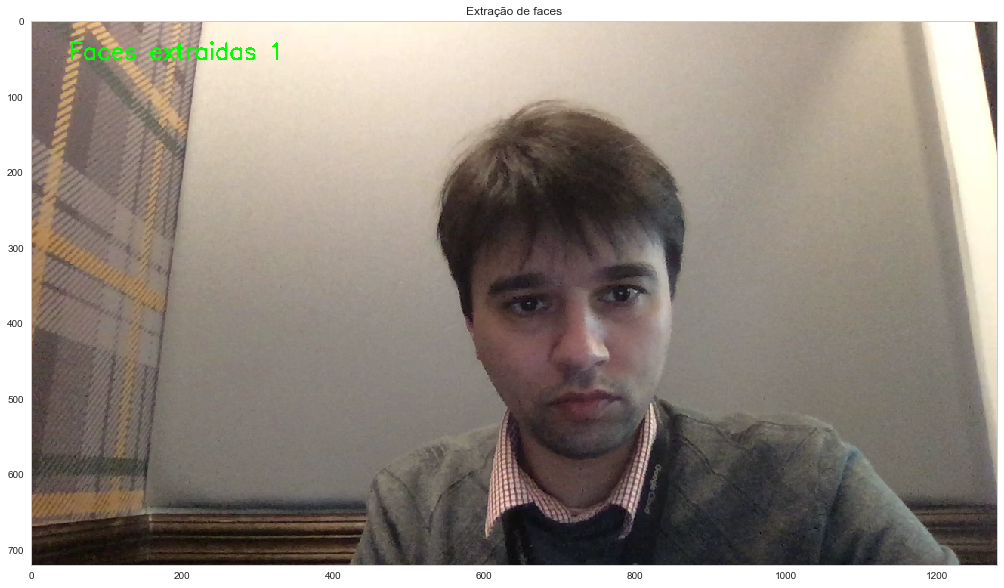

In [4]:
imagem = cv2.imread("imagens/camera_output_1.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Extração de faces")

### Windows

In [ ]:
cam_capture = cv2.VideoCapture(0)

contador = 0

while contador <= 99:
    ret, frame = cam_capture.read()
    
    if ret:
        if face_extractor(frame) is not None:
            contador += 1

            face = cv2.resize(face_extractor(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            imagem_path = 'imagens/faces/michel/' + str(contador) + '.jpg'
            cv2.imwrite(imagem_path, face)

            cv2.putText(frame, "Faces extraidas " +  str(contador), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

        cv2.imshow("Tracos", frame)
        
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

### MacOS

In [42]:
cam_capture.release()
cam_capture = cv2.VideoCapture(0)

contador = 0

try:
    while contador <= 99:
        ret, frame = cam_capture.read()

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            if face_extractor(frame) is not None:
                contador += 1

                face = cv2.resize(face_extractor(frame), (200, 200))
                face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
                imagem_path = 'imagens/faces/michel/' + str(contador) + '.jpg'
                cv2.imwrite(imagem_path, face)
            
                cv2.putText(frame, "Faces extraidas " +  str(contador), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            #cv2.imshow('Rosto Normalizado', face)
            
            img = PIL.Image.fromarray(frame, "RGB")
            buffer = BytesIO()
            img.save(buffer,format="JPEG")        
            display(Image(data=buffer.getvalue()))

            cv2.imwrite("imagens/camera_output_1.png", frame)

            clear_output(wait=True)
except KeyboardInterrupt:
    cam_capture.release()
    print("Interrompido")

Interrompido


**Treinamento do modelo**

Podemos testar os diversos tipos de classificadores, no entanto, o classificador LBPH tem o uso com melhor performance dentre o Eingenfaces e Fisherfaces.
Neste caso como temos apenas uma única pessoa, nosso dicionário de pessoas, ficou apenas com um único registro. Em casos de multiclasses, ou seja, mais de uma pessoa, cada uma delas deve ter um *id* associado, que é o valor de chave do dicionário.

In [28]:
# Carregando exemplos de arquivos previamente coletados
faces_path = 'imagens/faces/michel/'
lista_arquivos_imagens = [f for f in listdir(faces_path) if isfile(join(faces_path, f))]

dados_treinamento, labels = [], []

# Lendo as imagens e associando a um label
for i, arquivos in enumerate(lista_arquivos_imagens):
    imagem_path = faces_path + lista_arquivos_imagens[i]
    imagem = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)
    dados_treinamento.append(imagem)
    labels.append(0)

# Criando uma matriz da lista de labels
labels = np.asarray(labels, dtype=np.int32)

# Treinamento do modelo
model = cv2.face.LBPHFaceRecognizer_create()
#model = cv2.face.FisherFaceRecognizer_create()
#model = cv2.face.EigenFaceRecognizer_create()
model.train(dados_treinamento, labels)

print("Modelo treinado com sucesso.")

pessoas = {0: "Michel"}

Modelo treinado com sucesso.


**Inferência do modelo**

Função para identificar o rosto e segmentar da imagme principal. Também utilizaremos para desenhar um retângulo delimitador.
Note que estamos normalizando a imagem (mesma escala, 200 x 200) que as imagens de treinamento.

In [33]:
def face_detector(imagem):
    classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')
    imagem_gray = cv2.cvtColor(imagem,cv2.COLOR_RGB2GRAY)
    faces = classificador_face.detectMultiScale(imagem_gray, 1.1, 5)
    
    if faces is ():
        return imagem, [], 0, 0
    
    for (x,y,w,h) in faces:
        cv2.rectangle(imagem,(x,y),(x+w,y+h),(0,255,255),2)
        roi = imagem[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    
    return imagem, roi, x, y

Obtendo as imagems por meio da câmera e fazendo a inferência on-line.

Text(0.5,1,'Inferência do modelo')

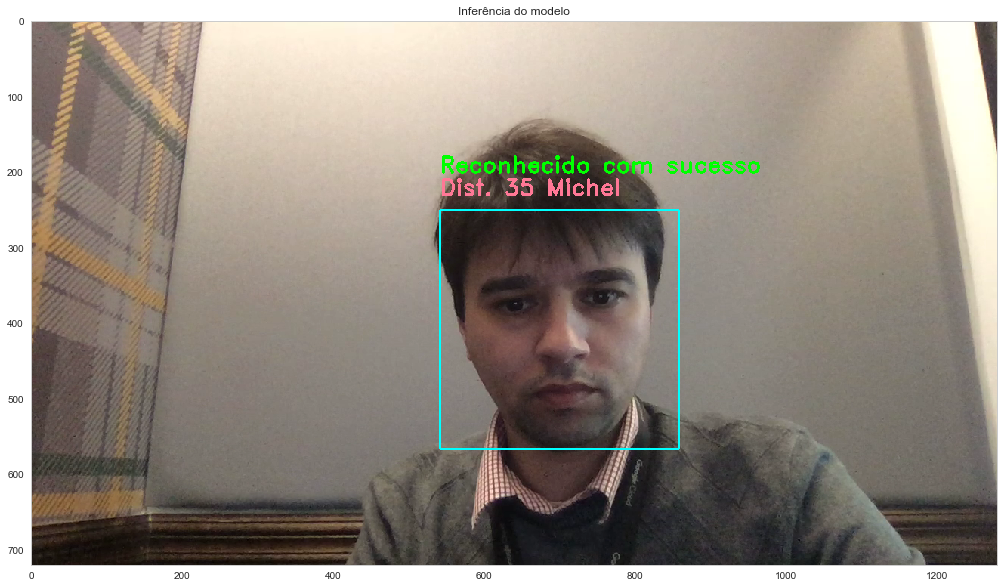

In [6]:
imagem = cv2.imread("imagens/camera_output_2.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Inferência do modelo")

### Windows

In [ ]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        imagem, face, x, y = face_detector(frame)

        if face is not ():
            face = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)
            predicao = model.predict(face)

            if x > 0:
                notificacao = "Dist. " + str(int(predicao[1])) + ' ' + pessoas[predicao[0]] 
                cv2.putText(frame, notificacao, (x, y-20), cv2.FONT_HERSHEY_DUPLEX, 1, (255,120,150), 2)

            if int(predicao[1]) < 40:
                cv2.putText(frame, "Reconhecido com sucesso", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 2)
            else:
                cv2.putText(frame, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
                
        cv2.imshow("Tracos", frame)
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

### MacOS

In [46]:
cam_capture.release()
cam_capture = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cam_capture.read()

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            imagem, face, x, y = face_detector(frame)

            if face is not ():
                face = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)
                predicao = model.predict(face)
                
                if x > 0:
                    notificacao = "Dist. " + str(int(predicao[1])) + ' ' + pessoas[predicao[0]] 
                    cv2.putText(frame, notificacao, (x, y-20), cv2.FONT_HERSHEY_DUPLEX, 1, (255,120,150), 2)

                if int(predicao[1]) < 40:
                    cv2.putText(frame, "Reconhecido com sucesso", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 2)
                else:
                    cv2.putText(frame, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
                
            #cv2.imshow('Rosto Normalizado', face)
            
            img = PIL.Image.fromarray(frame, "RGB")
            buffer = BytesIO()
            img.save(buffer,format="JPEG")        
            display(Image(data=buffer.getvalue()))

            cv2.imwrite("imagens/camera_output_2.png", frame)

            clear_output(wait=True)
except KeyboardInterrupt:
    cam_capture.release()
    print("Interrompido")

Interrompido


### Reconhecimento de caracteres (OCR)

Treinamento de classificador baseado em uma imagem de dígitos numéricos de 0 a 9.
Referencie a este [deep-learning-mnist.ipynb](deep-learning-mnist.ipynb) notebook.

Preparando funções para identificar um dígito a partir de uma nova imagem

In [67]:
def contorno_centroide(contorno):
    # Obtem centróide X
    M = cv2.moments(contorno)
    centroide = int(M["m10"]/M["m00"])
    return centroide

In [56]:
def converter_quadrado(imagem):
    # Transforma uma imagem no formato quadrado (dimensões iguais)
    preenchimento_vazio = [0,0,0]
    
    height = imagem.shape[0]
    width = imagem.shape[1]

    if (height == width):
        return imagem
    else:
        duplicar_tamanho = cv2.resize(imagem, (2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        if (height > width):
            pad = int((height - width)/2)
            duplicar_tamanho_quadrado = cv2.copyMakeBorder(duplicar_tamanho, 0, 0, pad, pad,
                                                           cv2.BORDER_CONSTANT, value=preenchimento_vazio)
        else:
            pad = int((width - height)/2)
            duplicar_tamanho_quadrado = cv2.copyMakeBorder(duplicar_tamanho, pad, pad, 0, 0,
                                                   cv2.BORDER_CONSTANT, value=preenchimento_vazio)
    
    return duplicar_tamanho_quadrado

In [48]:
from keras.models import load_model
model = load_model("modelos/model-minst.h5")  
model.load_weights("pesos/weights-minst.h5")
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


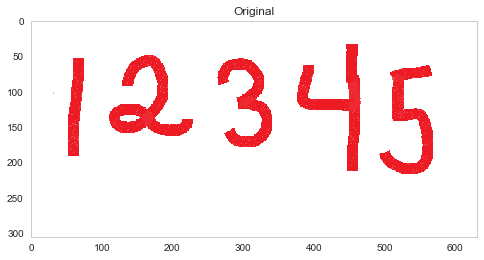

In [49]:
import numpy as np
import cv2

# Carregando imagem para detecção
imagem = cv2.imread('imagens/numeros.png')
imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2RGB)
imagem_gray = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 10))
plt.title("Original")
plt.imshow(imagem)

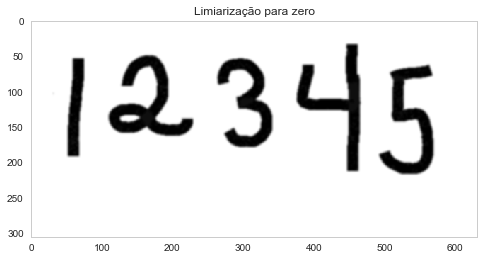

In [50]:
# Suavizando a imagem para posterior detecção de borda por Canny 

imagem_suavizada = cv2.GaussianBlur(imagem_gray, (7, 7), 0)
plt.figure(figsize=(8, 10))
plt.title("Limiarização para zero")
plt.imshow(imagem_suavizada, cmap="gray")

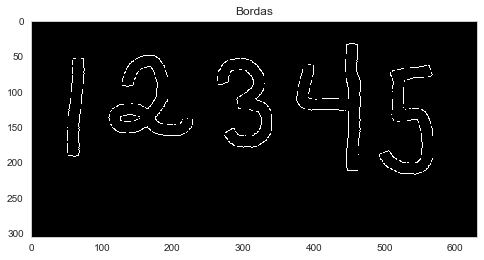

In [51]:
imagem_bordas = cv2.Canny(imagem_suavizada, 30, 150)
plt.figure(figsize=(8, 10))
plt.title("Bordas")
plt.imshow(imagem_bordas, cmap="gray")

Utilizamos a função de enquadramento **converter_quadrado** para lidar quando o dígito é muito pequeno, como por exemplo o dígito 1. Deste modo é criado uma imagem com bordas para que o classificador seja capaz de inferir adequadamente, ou seja, da mesma forma com que foi treinado.

Text(0.5,1,'Dígito 1 sem enquadramento')

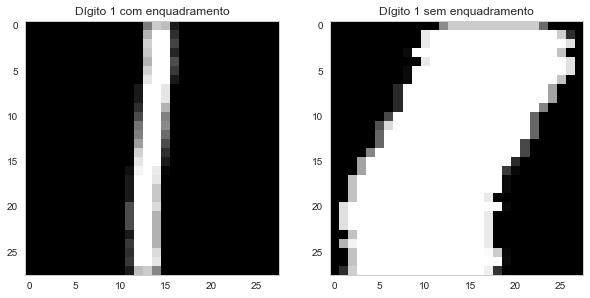

In [70]:
plt.figure(figsize=(10,5))

imagem_quadrado = cv2.imread('imagens/digit_1.png')
imagem_n_quadrado = cv2.imread('imagens/digit_nq1.png')


#Composição Vermelha
plt.subplot(1,2,1)
plt.imshow(imagem_quadrado)
plt.title("Dígito 1 com enquadramento")

#Composição Verde
plt.subplot(1,2,2)
plt.imshow(imagem_n_quadrado)
plt.title("Dígito 1 sem enquadramento")

(28, 28)
1
(28, 28)
2
(28, 28)
3
(28, 28)
4
(28, 28)
5
Numero identificado 12345


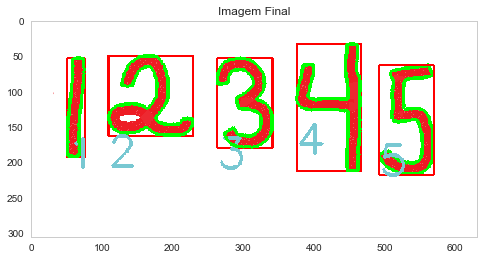

In [69]:
# Encontrando contornos
im2, contornos, hierarchy = cv2.findContours(imagem_bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Ordenando contornos pela coordenada X
contornos = sorted(contornos, key = contorno_centroide, reverse = False)

full_number = []

imagem_contornos = imagem.copy()
cont = 0
for c in contornos:
    cont = cont + 1
    # Para cada contorno, desenhar um retângulo para capturar a escrita
    (x, y, w, h) = cv2.boundingRect(c)    
    cv2.drawContours(imagem_contornos, contornos, -1, (0,255,0), 3)
    
    # Validando tamanho da imagem
    if w >= 5 and h >= 25:
        roi = imagem_suavizada[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        
        imagem_quadrado = converter_quadrado(roi)
        
        #cv2.imwrite("digit_" + str(cont) + ".png", imagem_quadrado)
        #cv2.imwrite("digit_" + str(cont) + ".png", cv2.resize(imagem_quadrado, (28,28), interpolation = cv2.INTER_AREA))
        
        final = cv2.resize(imagem_quadrado, (28,28), interpolation = cv2.INTER_AREA)
        
        print(final.shape)
        pred = model.predict(final.reshape(1, 28, 28, 1))
        
        number = str(pred.argmax())
        full_number.append(number)
        
        # Retângulo em volta do dígito e número identificado
        cv2.rectangle(imagem_contornos, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(imagem_contornos, number, (x , y + 155), cv2.FONT_ITALIC, 2, (120, 200, 210), 3)
        print(number)

         
plt.figure(figsize=(8, 10))
plt.title("Imagem Final")
plt.imshow(imagem_contornos, cmap="gray")

print ("Numero identificado " + ''.join(full_number))

### Classificador de Faces

Gerando 100 exemplos de faces, utilizando a webcam.

In [6]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

# Extrator de faces
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    
    if faces is ():
        return None
    
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

cap = cv2.VideoCapture(0)
count = 0

# Coletar 100 exemplos de um determinado rosto
while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow("Amostra", frame)
        if face_extractor(frame) is not None:
            count += 1
            face = cv2.resize(face_extractor(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

            file_name_path = 'imagens/faces/michel/' + str(count) + '.jpg'
            cv2.imwrite(file_name_path, face)

            # Put count on images and display live count
            cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            cv2.imshow('Rosto Normalizado', face)

        if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
            break
        
cap.release()
cv2.destroyAllWindows()      
print("Colega de amostras completado")

Colega de amostras completado


Treinamento do modelo

In [9]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

# Carregando exemplos de arquivos previamente coletados
data_path = 'imagens/faces/michel/'
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]

training_data, labels = [], []

# Lendo as imagens e associando a um label
for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(images)
    labels.append(0)

# Criando uma matriz da lista de labels
labels = np.asarray(labels, dtype=np.int32)

# Treinamento do modelo
model = cv2.face.LBPHFaceRecognizer_create()
#model = cv2.face.EigenFaceRecognizer_create()
model.train(training_data, labels)

print("Modelo treinado com sucesso.")

persons = {0: "Michel"}

Modelo treinado com sucesso.


Implementando modelo

In [10]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

def face_detector(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.1, 5)
    if faces is ():
        return img, [], 0, 0
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi, x, y

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    image, face, x, y = face_detector(frame)
    
    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        
        print(results)
        
        if x > 0:
            display_string = "Dist. " + str(int(results[1])) + ' ' + persons[results[0]] 
            cv2.putText(image, display_string, (x, y-20), cv2.FONT_HERSHEY_DUPLEX, 1, (255,120,150), 2)

        if int(results[1]) < 40:
            cv2.putText(image, "Reconhecido com sucesso", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 2)
            cv2.imshow('Face Recognition', image)
        else:
            cv2.putText(image, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Face Recognition', image)
    except:
        cv2.putText(image, "Rosto nao identificado", (220, 120) , cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.putText(image, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.imshow('Face Recognition', image )
        
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()     

(0, 38.118317469435404)
(0, 38.34760165494925)
(0, 37.838130769870425)
(0, 38.17568832954155)
(0, 37.877374278012034)
(0, 36.94028740711946)
(0, 36.780750440857254)
(0, 37.421350258682175)
(0, 37.576361588710405)
(0, 37.71325066975237)
(0, 37.32211500569863)
(0, 36.45904823468689)
(0, 37.105901697693554)
(0, 37.12610623929233)
(0, 36.28899081293288)
(0, 36.83765300378565)
(0, 37.30300871971457)
(0, 36.79097519145297)
(0, 36.84635222832929)
(0, 36.35871963161574)
(0, 35.61867431192314)
(0, 36.04858560765531)
(0, 36.29018230115487)
(0, 35.847407993521024)
(0, 32.502484249169335)
(0, 31.013332365988706)
(0, 26.820080050648652)
(0, 24.206606110261188)
(0, 26.757914845598005)
(0, 25.419716525007885)
(0, 25.079785065015084)
(0, 29.40293422044869)
(0, 26.837450212974932)
(0, 25.709704024607063)
(0, 25.42619664334167)
(0, 25.202995465385307)
(0, 25.600205888140106)
(0, 24.782492120623562)
(0, 24.34670377781189)
(0, 26.736062340756707)
(0, 123.30684338096917)
(0, 27.362073706867413)
(0, 26.8559

(0, 44.09242277893189)
(0, 47.00575802878341)
(0, 46.95019992627918)
(0, 47.670274566947604)
(0, 50.16568696732048)
(0, 48.971160891885965)
(0, 48.309343154222745)
(0, 49.60712899930063)
(0, 48.849388238864265)
(0, 49.18107899629187)
(0, 51.11603575311437)
(0, 48.948289322127984)
(0, 51.5502748324688)
(0, 49.546776084255605)
(0, 50.405415866814586)
(0, 50.575005333432294)
(0, 50.93708005355217)
(0, 51.41979186521347)
(0, 51.648201932972256)
(0, 51.884113892991564)
(0, 52.575427917567524)
(0, 57.88207060271019)
(0, 51.63591218603911)
(0, 50.93814766332212)
(0, 50.79687728112255)
(0, 49.1558448871536)
(0, 49.871354183398104)
(0, 49.87779684368234)
(0, 49.69533455657069)
(0, 50.3601681162933)
(0, 49.56539646374138)
(0, 47.9520623504157)
(0, 48.70622282483802)
(0, 50.80075106307615)
(0, 47.462222025348986)
(0, 48.30971239719539)
(0, 46.020226574292664)
(0, 50.2238777713763)
(0, 45.730367416532374)
(0, 46.81966383074332)
(0, 43.27405522546912)
(0, 44.185237344704106)
(0, 44.20842489275711)


(0, 109.87162328173484)
(0, 108.74419417639908)
(0, 109.44300002392453)
(0, 111.39091568956951)
(0, 107.35430304639313)
(0, 103.98297951413309)
(0, 117.12196676594549)
(0, 121.64772831777636)
(0, 113.57811622214128)
(0, 112.98815100418939)
(0, 123.1898142121904)
(0, 121.3100414344929)
(0, 115.21916615170444)
(0, 117.51769544585062)
(0, 110.75956027195299)
(0, 100.731603953579)
(0, 105.51501145269285)
(0, 107.19604047338974)
(0, 106.08113435838169)
(0, 131.21167586871888)
(0, 129.53721674825042)
(0, 119.14039271977991)
(0, 110.52807605222856)
(0, 104.98334291173279)
(0, 114.00333316619641)
(0, 111.35379272792258)
(0, 130.80824557467977)
(0, 127.17088827131296)
(0, 122.69739201525304)
(0, 85.58639468570041)
(0, 83.77249825516647)
(0, 83.99487407841347)
(0, 117.56777727071842)
(0, 118.64931883863653)
(0, 116.91299312301453)
(0, 116.47831884605866)
(0, 113.96240627936092)
(0, 118.8573666088128)
(0, 104.62972564160043)
(0, 109.6710841790435)
(0, 112.5923525275369)
(0, 114.08571583530247)
(0

(0, 40.818324994660735)
(0, 41.30594917801748)
(0, 40.63273154550422)
(0, 39.97127589959451)
(0, 35.17204109008305)
(0, 36.385238955387265)
(0, 35.33661345421936)
(0, 37.22776208243856)
(0, 36.51084108944292)
(0, 43.922599274876276)
(0, 46.49410358313818)
(0, 44.68279553291773)
(0, 44.1945608664663)
(0, 42.335180416602626)
(0, 42.5401237119035)
(0, 43.81567466790037)
(0, 44.85580682351845)
(0, 44.22129486419762)
(0, 45.961283688666875)
(0, 43.366981050802906)
(0, 44.381264600195)
(0, 45.00009333337847)
(0, 40.63020012505099)
(0, 40.18548581397452)
(0, 51.50514142074856)
(0, 62.82057104699709)
(0, 40.2417339235013)
(0, 39.084578312200165)
(0, 36.44937636506227)
(0, 34.697588082968224)
(0, 35.531974099467774)
(0, 38.14827212026514)
(0, 37.07267017697732)
(0, 37.98160085593781)
(0, 37.030168011339725)
(0, 38.90911860076242)
(0, 37.5347168058664)
(0, 36.3128243661112)
(0, 36.51895992409354)
(0, 36.64905777112209)
(0, 36.18555811175014)
(0, 36.758362710446896)
(0, 36.15826336498406)
(0, 35.

### Yolo (You Only Look Once)
#### Classificador de objeto instantâneo

É necessário baixar os pesos (modelo de deep-learning) neste link https://pjreddie.com/media/files/yolov3.weights e copiar para  pasta weights.

In [3]:
from utils import *
from darknet import Darknet

# Configurações na rede neural YOLOv3
cfg_file = 'cfg/yolov3.cfg'
m = Darknet(cfg_file)

# Pesos pré-treinados
weight_file = 'pesos/yolov3.weights'
m.load_weights(weight_file)

# Rótulos de classes
namesfile = 'data/coco.names'
class_names = load_class_names(namesfile)

In [4]:
np.version.version

'1.15.2'

In [5]:
# Topologia da rede neural da YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

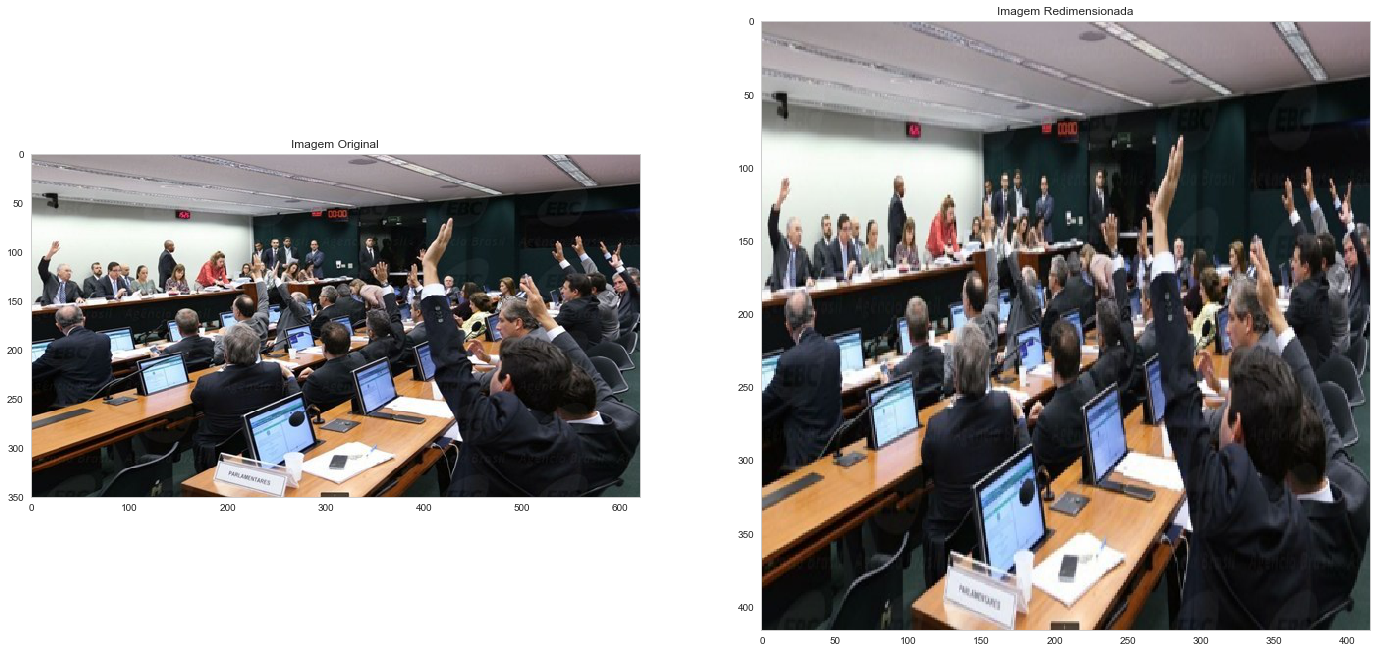

In [7]:
# Tamanho da figura
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregando imagem para classificar
img_path = "imagens/camara.jpg"
img = cv2.imread(img_path)

# Convertendo para o espaço de cores RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionando imagem para ser compatível com a primeira camada da rede neural  
resized_image = cv2.resize(original_image, (m.width, m.height))

# Exibição das imagens
plt.subplot(121)
plt.title("Imagem Original")
plt.imshow(original_image)
plt.subplot(122)
plt.title("Imagem Redimensionada")
plt.imshow(resized_image)
plt.show()

In [8]:
# Patamar de NMS (Non-Maximum Supression)
# Ajuste de sensibilidade de imagens com baixa luminosidade
nms_thresh = 0.6

# Patamar do IOU (Intersect of Union), indicador se o retângulo 
# de identificação de imagem foi adequadamente desenhado
iou_thresh = 0.4



It took 1.984 seconds to detect the objects in the image.

Number of Objects Detected: 24 

Objects Found and Confidence Level:

1. computador portátil: 0.999996
2. pessoa: 1.000000
3. computador portátil: 0.982110
4. tv: 0.709401
5. pessoa: 1.000000
6. computador portátil: 0.987804
7. pessoa: 1.000000
8. pessoa: 1.000000
9. computador portátil: 0.997870
10. pessoa: 1.000000
11. pessoa: 1.000000
12. pessoa: 1.000000
13. pessoa: 0.999995
14. pessoa: 1.000000
15. pessoa: 1.000000
16. pessoa: 0.999999
17. pessoa: 0.999972
18. pessoa: 0.999999
19. copo: 0.999950
20. pessoa: 1.000000
21. computador portátil: 0.961230
22. celular: 0.998715
23. pessoa: 0.999998
24. pessoa: 0.999998


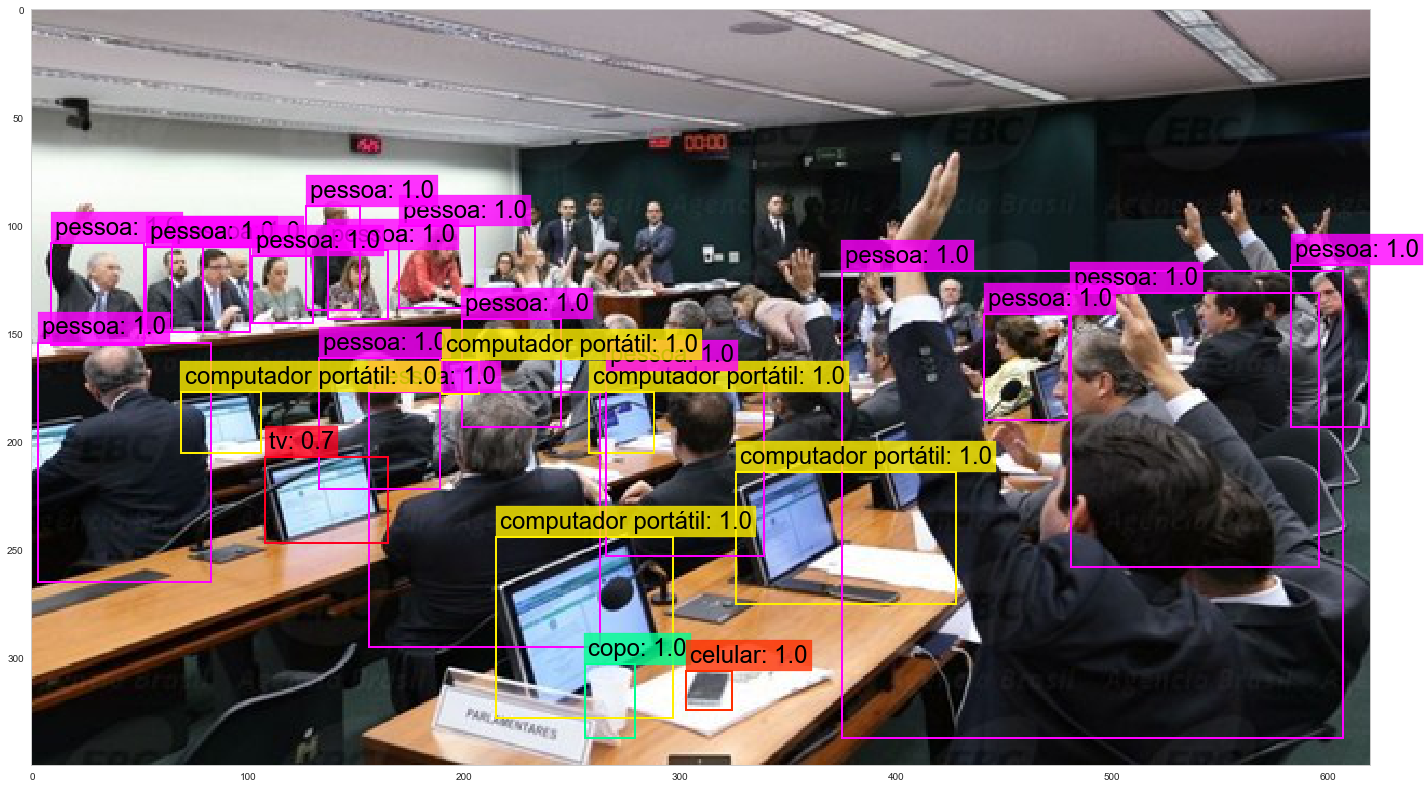

In [9]:
# Definindo tamnaho do gráfico
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregar imagem para classificação
img = cv2.imread(img_path)

# Conversão para o espaço RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionamento para adatapção da primeira camada da rede neural 
resized_image = cv2.resize(original_image, (m.width, m.height))

# Deteteção de objetos na imagem
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Objetos encontrados e nível de confiança
print_objects(boxes, class_names)

# Desenho no gráfico com os regângulos e rótulos
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [10]:
list_objects(boxes, class_names)

['computador portátil',
 'pessoa',
 'computador portátil',
 'tv',
 'pessoa',
 'computador portátil',
 'pessoa',
 'pessoa',
 'computador portátil',
 'pessoa',
 'pessoa',
 'pessoa',
 'pessoa',
 'pessoa',
 'pessoa',
 'pessoa',
 'pessoa',
 'pessoa',
 'copo',
 'pessoa',
 'computador portátil',
 'celular',
 'pessoa',
 'pessoa']